In [1]:
#!/usr/bin/env python
# coding: utf-8
# version: 2020.03.29

import sys
for path in ['../','../../','../../../','../../../../']:
    sys.path.append(path+"CNT_Code/V1.05.22")
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from RegressionTools import *
from GraphTools import *
from GeneralTools import *
# from GraphModel import *
from GraphModel_cnt import *
from CNT_Dataset import *
from ModelSelection import *

# --------------------------------------------------------------------------------------------------------
# args
# --------------------------------------------------------------------------------------------------------


# import argparse
# parser = argparse.ArgumentParser(description='Model selection')
# parser.add_argument('--id_graph', default=0, type=int, help='id_graph')

# args = parser.parse_args()
# id_graph = args.id_graph

# --------------------------------------------------------------------------------------------------------

In [2]:
id_graph = 10

GB_ESTIMATORS = 100 # 400
GB_SEARCH_ITER = 40 # 80
CV = 4
RATIO = 0.9
MULTI_ESTIMATOR = 10 # 50
MULTI_PREDICTION = 10 # 50
SCORE_RUN = 5

In [3]:
data_org = pd.read_excel('data_all_back_A.xlsx') 
graph_array = data_load('graph_array_368.dat')

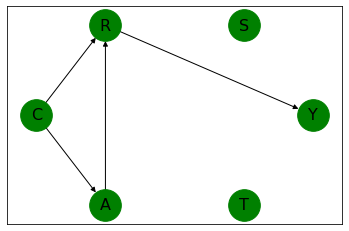

In [4]:
G = graph_array[id_graph]
nx_plot_cnt(G)

In [5]:
gm = GraphModel_cnt(G=G,idy='Y',renamer=cnt_renamer,
                    assign_submodel=assign_submodel_cnt,
                    gb_estimators=GB_ESTIMATORS,n_iter_search=GB_SEARCH_ITER,submodel_cv=CV,
                   )

score_array = []
for i in range(SCORE_RUN):
    data = random_resample(data_org)
    data = data.dropna(subset=gm.renamer(idAll),how='any').reset_index(drop=True) # all-valid
    score = cross_val_score_gm(gm,data,reuse=False,cv=CV,
                               ratio=RATIO,
                               n_estimator=MULTI_ESTIMATOR,
                               n_predict=MULTI_PREDICTION)
    score['model'] = nx2str(gm.G,model=True)
    score_array.append(score)

['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)'] A [0.484306060613129, 0.48556338052409875, 0.665271088692611]
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)', 'A'] R [0.6895095294495246, 0.6953776179816412, 0.7805113648838221]
['R'] Y [0.5345446232243801, 0.534973315736153, 0.5899002634749435]
*,*,*,*,.
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)'] A [0.5132408520666503, 0.5203474339987517, 0.668752583304299]
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)', 'A'] R [0.6567398180446439, 0.661385544075894, 0.7806020029439156]
['R'] Y [0.5188703484256506, 0.5188754909067901, 0.6500760669643393]
*,*,*,*,.
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)'] A [0.47570160388918703, 0.4786665678512721, 0.6932673022753306]
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)', 'A'] R [0.6886325048703488, 0.6890135846417978, 0.82

In [6]:
scores = pd.concat(score_array)
# scores.to_excel('score_graph_%d.xlsx'%id_graph)
scores

,r2_score,mean_squared_error,scaled_rmse,r2_score (mean pred),mean_squared_error (mean pred),scaled_rmse (mean pred),r2_score (median pred),mean_squared_error (median pred),scaled_rmse (median pred),KL_Gaussian_inv (ps mean),...,KL_Gaussian_var (ps median),KL_Gaussian_inv(p) (ps mean),KL_Gaussian_var_inv(p) (ps mean),KL_Gaussian(p) (ps mean),KL_Gaussian_var(p) (ps mean),KL_Gaussian_inv(p) (ps median),KL_Gaussian_var_inv(p) (ps median),KL_Gaussian(p) (ps median),KL_Gaussian_var(p) (ps median),model
0,0.625084,0.882989,0.198579,0.640605,0.846435,0.194425,0.645210,0.835590,0.193176,43.331901,...,41.345185,43.382169,43.356869,244.124356,240.611057,20.416330,20.416330,97.981956,94.537333,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.463825,1.189224,0.234620,0.541435,1.017087,0.216977,0.523388,1.057114,0.221205,57.485811,...,4.796408,59.181527,59.177167,488.032711,487.192058,25.469351,25.469351,10.833010,10.507542,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.587831,0.960236,0.205335,0.599529,0.932981,0.202400,0.574013,0.992428,0.208749,49.285722,...,46.444011,50.802509,50.767650,401.957495,396.831760,24.154160,24.154160,116.004434,112.390363,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.629286,0.862050,0.195526,0.686737,0.728453,0.179737,0.667611,0.772929,0.185143,40.004750,...,24.189325,40.810489,40.786026,265.160280,261.490130,17.501166,17.501166,61.582004,60.311794,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.647574,0.839816,0.194406,0.655502,0.820923,0.192207,0.644999,0.845951,0.195114,45.186022,...,10.796092,45.757198,45.744850,137.162408,134.568096,22.933058,22.933058,28.862514,26.998762,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
